In [1]:
from Solution import *
solve = Solution()
G = solve.build_graph()

In [2]:
import pandas as pd
data = pd.read_csv('TempResult\社区路口连接数据.csv')
intersection = list(set(data['最近路口节点']))
community = pd.read_excel('Data\community.xlsx')
demand = (community['小区人口数（人）']*0.4).tolist()

In [3]:
distance = list()
for i in range(len(intersection)):
    start = intersection[i]
    shortest_distance_dict = nx.shortest_path_length(G, source='i'+str(start),weight='weight')
    distance.append([shortest_distance_dict['c'+ str(i)] for i in range(1,1410)])
distance = np.array(distance)

In [4]:
import gurobipy as gb
intersection_length=len(intersection)
community_length=1409
model=gb.Model()
Q = model.addVars(intersection_length,community_length,lb=0.0,ub=40000,vtype=gb.GRB.CONTINUOUS, name='Q')  # 添加变量
R = model.addVars(intersection_length,vtype=gb.GRB.BINARY,name='R')
print("变量添加完毕")
model.addConstrs(
    gb.quicksum(Q[k,l]*R[k] for k in range(intersection_length)) == demand[l] for l in range(community_length)
)
print('约束1添加完毕')
model.addConstrs(
    gb.quicksum(Q[k,l] for l in range(community_length)) <= 40000 for k in range(intersection_length)
)
print("约束2添加完毕")
model.addConstr(
    gb.quicksum(R[k] for k in range(intersection_length)) <= 71
)


变量添加完毕
约束1添加完毕
约束2添加完毕


<gurobi.Constr *Awaiting Model Update*>

In [5]:

model.setObjective(
    gb.quicksum(
        Q[k,l] * distance[k,l] * R[k] for l in range(community_length) for k in range(intersection_length)
    ), gb.GRB.MINIMIZE
)  # 添加目标函数
print("目标函数设置完毕")

目标函数设置完毕


In [6]:
model.Params.TimeLimit=3600
model.optimize()

Set parameter TimeLimit to value 3600
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 1107 rows, 1559460 columns and 1559460 nonzeros
Model fingerprint: 0x9b5eb260
Model has 1558354 quadratic objective terms
Model has 1409 quadratic constraints
Variable types: 1558354 continuous, 1106 integer (1106 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [4e+00, 6e+04]
  Bounds range     [1e+00, 4e+04]
  RHS range        [7e+01, 4e+04]
  QRHS range       [3e+01, 6e+03]
Presolve time: 4.73s
Presolved: 4677578 rows, 3117814 columns, 14026292 nonzeros
Variable types: 3116708 continuous, 1106 integer (1106 binary)
Found heuristic solution: objective 2.691601e+09

Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Root barrier log...

In [7]:
intersection_node = list()
intersection_x = list()
intersection_y = list()
for i in range(len(intersection)):
    if round(R[i].X) != 0:
        intersection_node.append(intersection[i])

In [8]:
res = pd.DataFrame({'intersection_node':intersection_node})
res.to_csv('无货车.csv',index=False)

In [9]:
import pandas as pd
old_data = pd.read_excel('Data\intersection_node.xlsx')
intersection_node = pd.read_csv('无货车.csv')['intersection_node']
intersection_node = pd.merge(intersection_node,old_data,left_on='intersection_node',right_on='节点编号',
                             how='inner')[['节点编号','路口横坐标','路口纵坐标']]
areas = pd.read_csv('TempResult\社区路口连接数据.csv')
intersection_node = pd.merge(intersection_node,areas,left_on='节点编号',right_on='最近路口节点',how='inner')
intersection_node = intersection_node[['节点编号','路口横坐标','路口纵坐标','所属区域']]
intersection_node.drop_duplicates(subset=['节点编号'], keep='first', inplace=True)
intersection_node.reset_index(drop=True, inplace=True)
intersection_node.to_csv('无货车结果(集散中心).csv',index=False)
intersection_node.to_excel('无货车结果(集散中心).xlsx',index=False)

PermissionError: [Errno 13] Permission denied: '无货车结果(集散中心).xlsx'

In [ ]:
groups = intersection_node.groupby(['所属区域'])
areas=list()
center_x = list()
center_y = list()
for i in groups:
    ar,group_data = i
    areas.append(ar)
    center_x.append(group_data['路口横坐标'].mean())
    center_y.append(group_data['路口纵坐标'].mean())
cangku = pd.DataFrame({
    '节点编号':[i+1 for i in range(len(areas))],
    '区域':areas,
    '仓库中心横坐标':center_x,
    '仓库中心纵坐标':center_y
})
cangku.to_csv('无货车结果(仓库).csv',index=False)
cangku.to_excel('无货车结果(仓库).xlsx',index=False)

In [ ]:
from Solution import *
solve = Solution() 
solve.draw_solution()

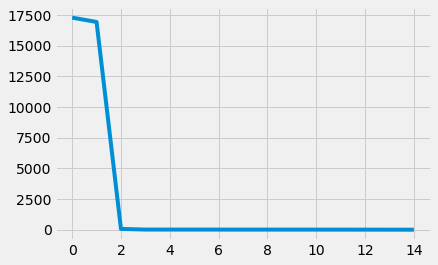

In [11]:
loss = [17281,16928,66,12,10.5,10.3,9.43,8.83,8.58,8.21,7.72,5.82,5.04,3.06,1.14]
plt.plot(loss)